# Data Exploration 02

In [1]:
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

Version: 2020-03-06 11:27:27


# Data Exploration

In [2]:
from utils import utils
import pandas as pd

csv = './data/preprocessed_d1d2_benchmark.csv'
df, x, y, x_train, x_test, y_train, y_test = utils.load_benchmark_dataset(csv, dropna=True)
df_na, x_na, y_na, x_train_na, x_test_na, y_train_na, y_test_na = utils.load_benchmark_dataset(csv)

temp_y = y.to_numpy().reshape(-1,)
temp_y_na = y_na.to_numpy().reshape(-1,)

dataset length: 1911
test size: 0.1
x_train length: 1719
x_test length: 192
dataset length: 3646
test size: 0.1
x_train length: 3281
x_test length: 365


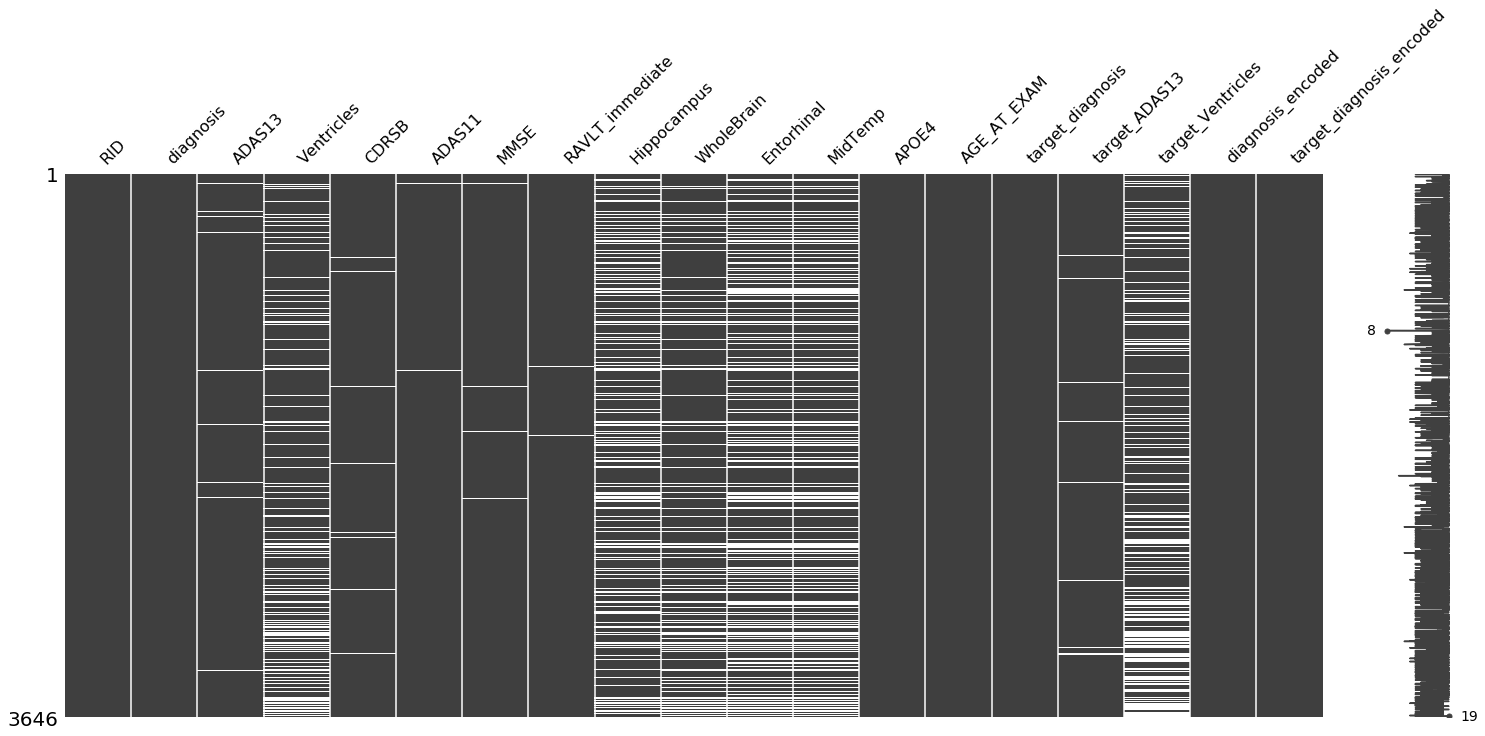

In [3]:
import missingno as msno
msno.matrix(df_na)

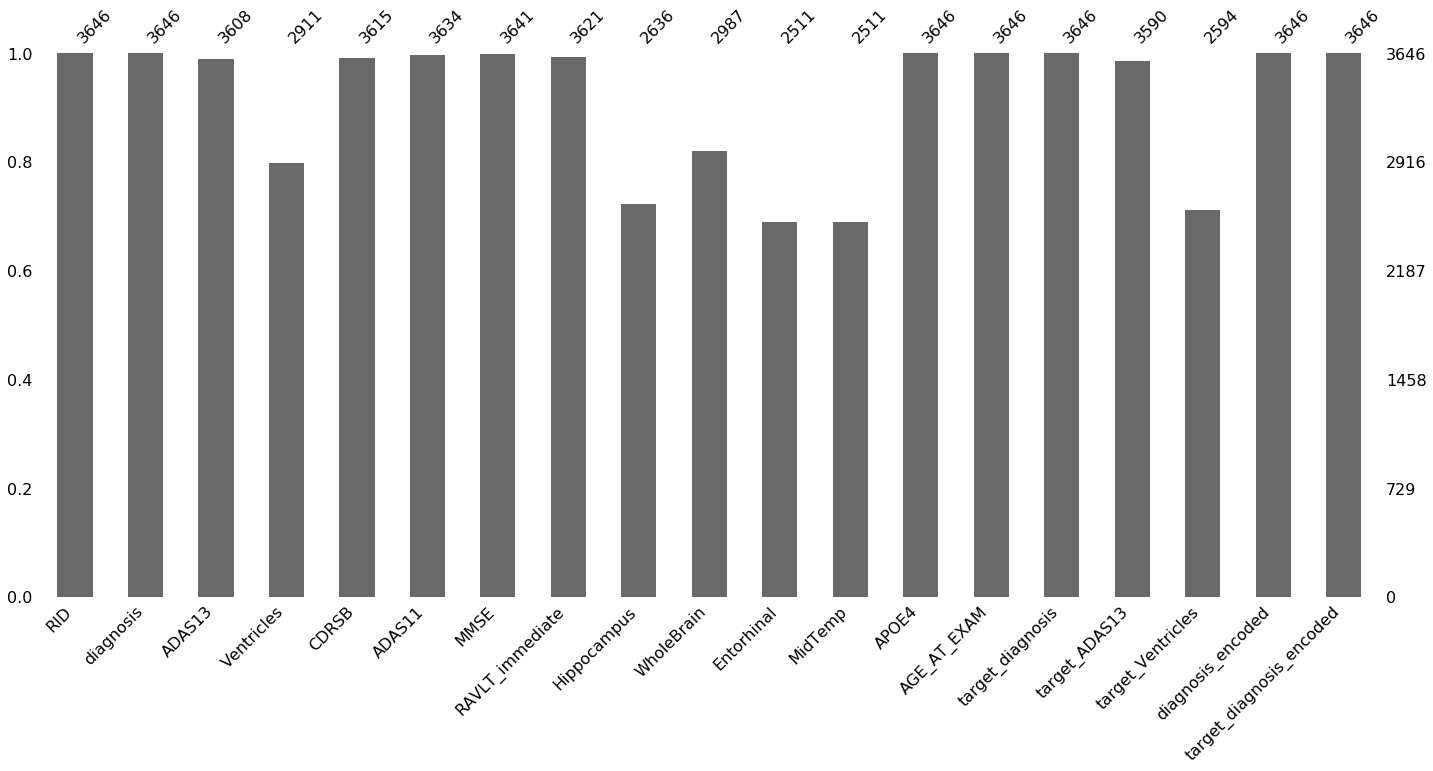

In [4]:
msno.bar(df_na)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e080430>,
             colormap=None, colors=None, labels=None)

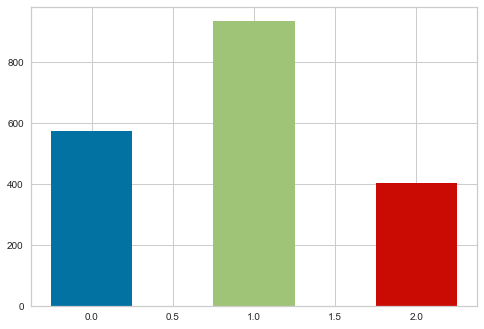

In [6]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()
visualizer.fit(temp_y)

//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


Rank1D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e442550>,
       color=None, features=None, orient=None, show_feature_names=None)

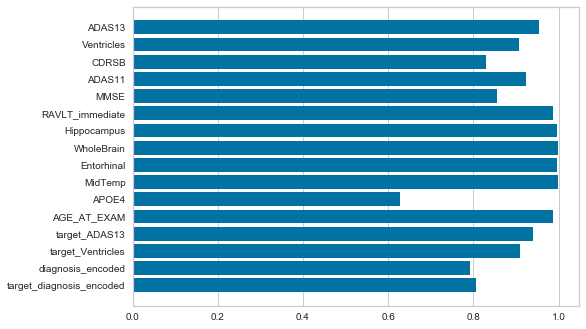

In [7]:
from yellowbrick.features import rank1d, rank2d, radviz

rank1d(df.drop(columns=['RID','diagnosis', 'target_diagnosis']))

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd14d00>,
       colormap='RdBu_r', features=None, show_feature_names=None)

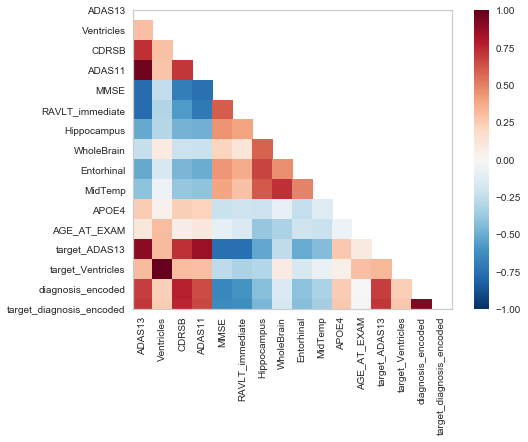

In [9]:
rank2d(df.drop(columns=['RID','diagnosis', 'target_diagnosis']))

//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


PCA(alpha=0.75,
    ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f0cae20>,
    classes=None, colorbar=True, colormap=None, colors=None, features=None,
    heatmap=False, proj_features=False, projection=2, random_state=None,
    scale=True)

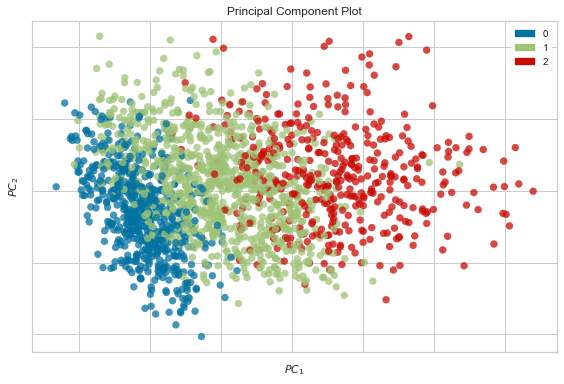

In [10]:
from yellowbrick.features import pca_decomposition

pca_decomposition(x, temp_y, projection=2)

In [26]:
from yellowbrick.features import ExplainedVariance

# Plotting individual variances + Kaiser
viz = ExplainedVariance(kaiser=True)
viz.fit(x)              # Fit the data to the visualizer
viz.transform(X)        # Transform the data
viz.poof()              # Draw/show/poof the data

# Scree plot
viz2 = ExplainedVariance(scree=True)
viz2.fit(x)
viz2.transform(X)
viz2.poof()

ImportError: cannot import name 'ExplainedVariance' from 'yellowbrick.features' (//anaconda3/envs/baylon/lib/python3.8/site-packages/yellowbrick/features/__init__.py)

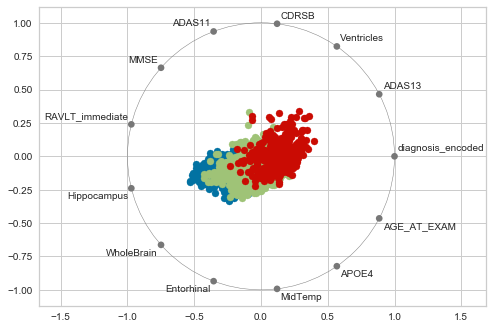

In [10]:
from yellowbrick.features import radviz

vis = radviz(x, temp_y)

ParallelCoordinates(alpha=None,
                    ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cc5cf70>,
                    classes=None, colormap=None, colors=None, fast=False,
                    features=None, normalize=None, random_state=None,
                    sample=1.0, shuffle=False, vlines=None,
                    vlines_kwds={'color': 'black', 'linewidth': 1})

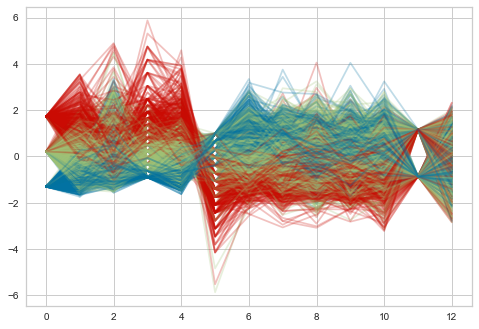

In [11]:
from yellowbrick.features import parallel_coordinates

parallel_coordinates(x_scaled, temp_y)

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1eec9f70>,
                   color=None, feature_index=None, feature_names=None,
                   labels=None, method='pearson', sort=False)

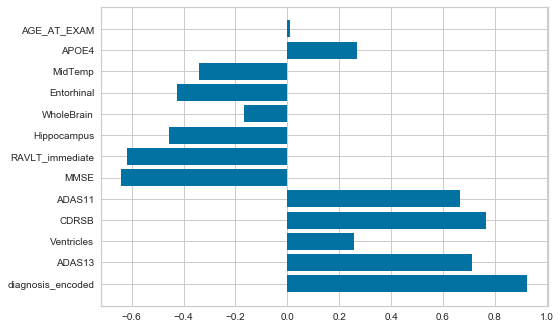

In [12]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation()
visualizer.fit(x, temp_y)

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ef42310>,
                   color=None, feature_index=None, feature_names=None,
                   labels=None, method='mutual_info-classification',
                   sort=False)

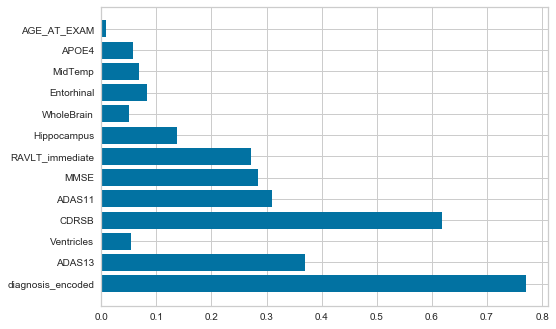

In [13]:
visualizer = FeatureCorrelation(method='mutual_info-classification')
visualizer.fit(x, temp_y)

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)
x_imp = imp.fit_transform(x_na)
x_imp = pd.DataFrame(data=x_imp, columns=x_na.columns)

//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/impute/_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


PCA(alpha=0.75,
    ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f4f2370>,
    classes=None, colorbar=True, colormap=None, colors=None, features=None,
    heatmap=False, proj_features=False, projection=2, random_state=None,
    scale=True)

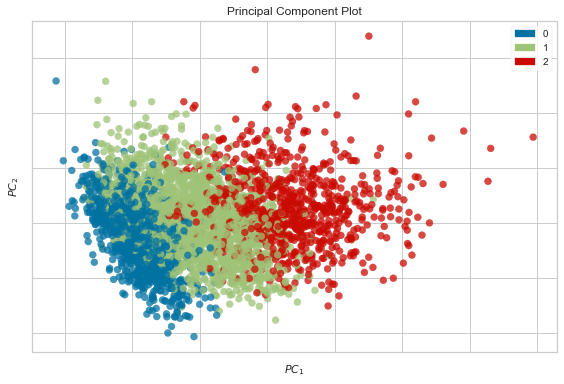

In [15]:
pca_decomposition(x_imp, temp_y_na, projection=2)

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f5e73a0>,
       colormap='RdBu_r', features=None, show_feature_names=None)

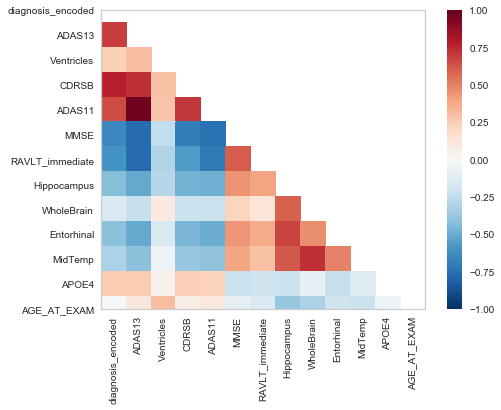

In [16]:
rank2d(x)

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f04bbb0>,
       colormap='RdBu_r', features=None, show_feature_names=None)

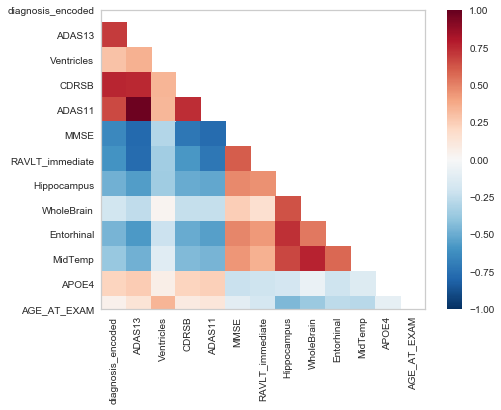

In [17]:
rank2d(x_imp)

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f44da90>,
                   color=None, feature_index=None, feature_names=None,
                   labels=None, method='pearson', sort=False)

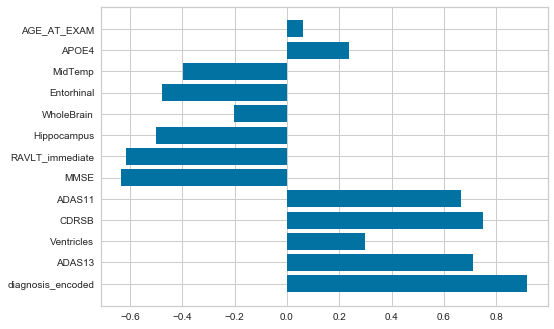

In [18]:
visualizer = FeatureCorrelation()
visualizer.fit(x_imp, temp_y_na)

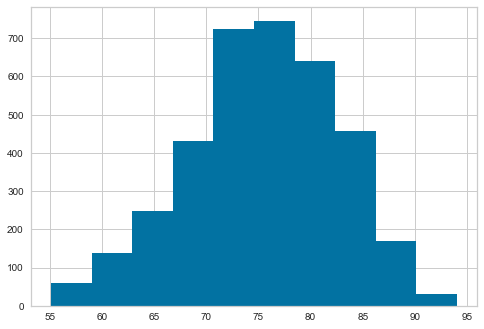

In [19]:
x_imp['AGE_AT_EXAM'].hist()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

svc_1 = SVC(random_state=42, probability=True)
svc_2 = SVC(random_state=42, probability=True)

scaled_svc_1 = Pipeline([
    ('scaler', scaler_1),
    ('svc', svc_1)
])

scaled_svc_2 = Pipeline([
    ('scaler', scaler_2),
    ('svc', svc_2)
])

# scaled_svc_1.fit(x_train, y_train)
# scaled_svc_2.fit(imp.transform(x_train_na), y_train_na)


1    86
0    57
2    49
Name: target_diagnosis_encoded, dtype: int64


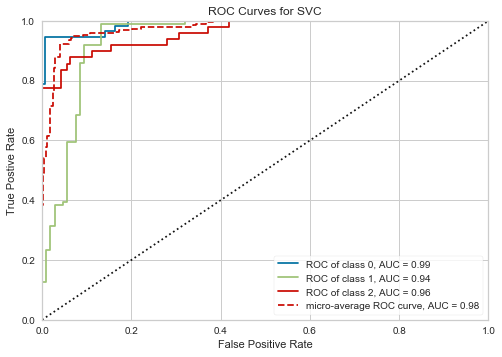

In [21]:
from yellowbrick.classifier import ROCAUC

print(y_test.value_counts())

visualizer_1 = ROCAUC(scaled_svc_1, macro=False)
visualizer_1.fit(x_train, y_train)
visualizer_1.score(x_test, y_test)
visualizer_1.show()
plt.show()

1    161
0    108
2     96
Name: target_diagnosis_encoded, dtype: int64


//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


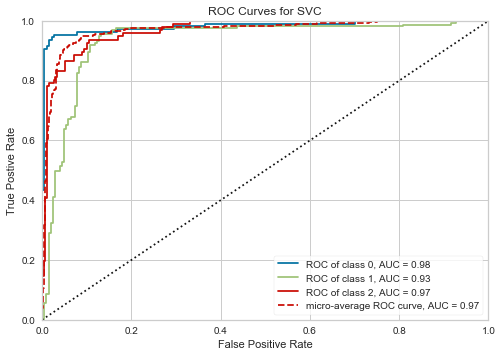

In [22]:
print(y_test_na.value_counts())

visualizer_2 = ROCAUC(scaled_svc_2, macro=False)
visualizer_2.fit(imp.transform(x_train_na), y_train_na)
visualizer_2.score(imp.transform(x_test_na), y_test_na)
visualizer_2.show()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

preds_1 = scaled_svc_1.predict_proba(x_test)
preds_2 = scaled_svc_2.predict_proba(imp.transform(x_test_na))

roc_auc_score(y_test, preds_1, multi_class='ovo'), roc_auc_score(y_test_na, preds_2, multi_class='ovo')

(0.9671520995178978, 0.964447863149554)

In [ ]:
x.columns

In [ ]:
x_features_subset = ['diagnosis_encoded', 'ADAS13',  'CDRSB', 'ADAS11', 'MMSE',
                     'RAVLT_immediate']

In [ ]:
scaler = StandardScaler()

svc = SVC(random_state=42, probability=True)

scaled_svc_1 = Pipeline([
    ('scaler', scaler),
    ('svc', svc)
])

preds = scaled_svc_2.predict_proba(imp.transform(x_test_na))

roc_auc_score(y_test, preds, multi_class='ovo')